Generate Markdown file with shell command:
```Shell
jupyter nbconvert --to markdown get_subdivcoords.ipynb
```

# Validate the `get_subdivcoords()` function

## Import packages

In [1]:
import sys
sys.path.insert(0, '..')
import pymatcal
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Read in the configuration from `YAML` file

In [2]:
config = pymatcal.get_config('../configs/config.yml')

## Plot the detector and the FOV

[2. 2. 2.]
[0.1 0.1 1. ]
[[10.025 10.025  0.25 ]
 [10.025 10.075  0.25 ]
 [10.075 10.025  0.25 ]
 [10.075 10.075  0.25 ]
 [10.025 10.025  0.75 ]
 [10.025 10.075  0.75 ]
 [10.075 10.025  0.75 ]
 [10.075 10.075  0.75 ]]


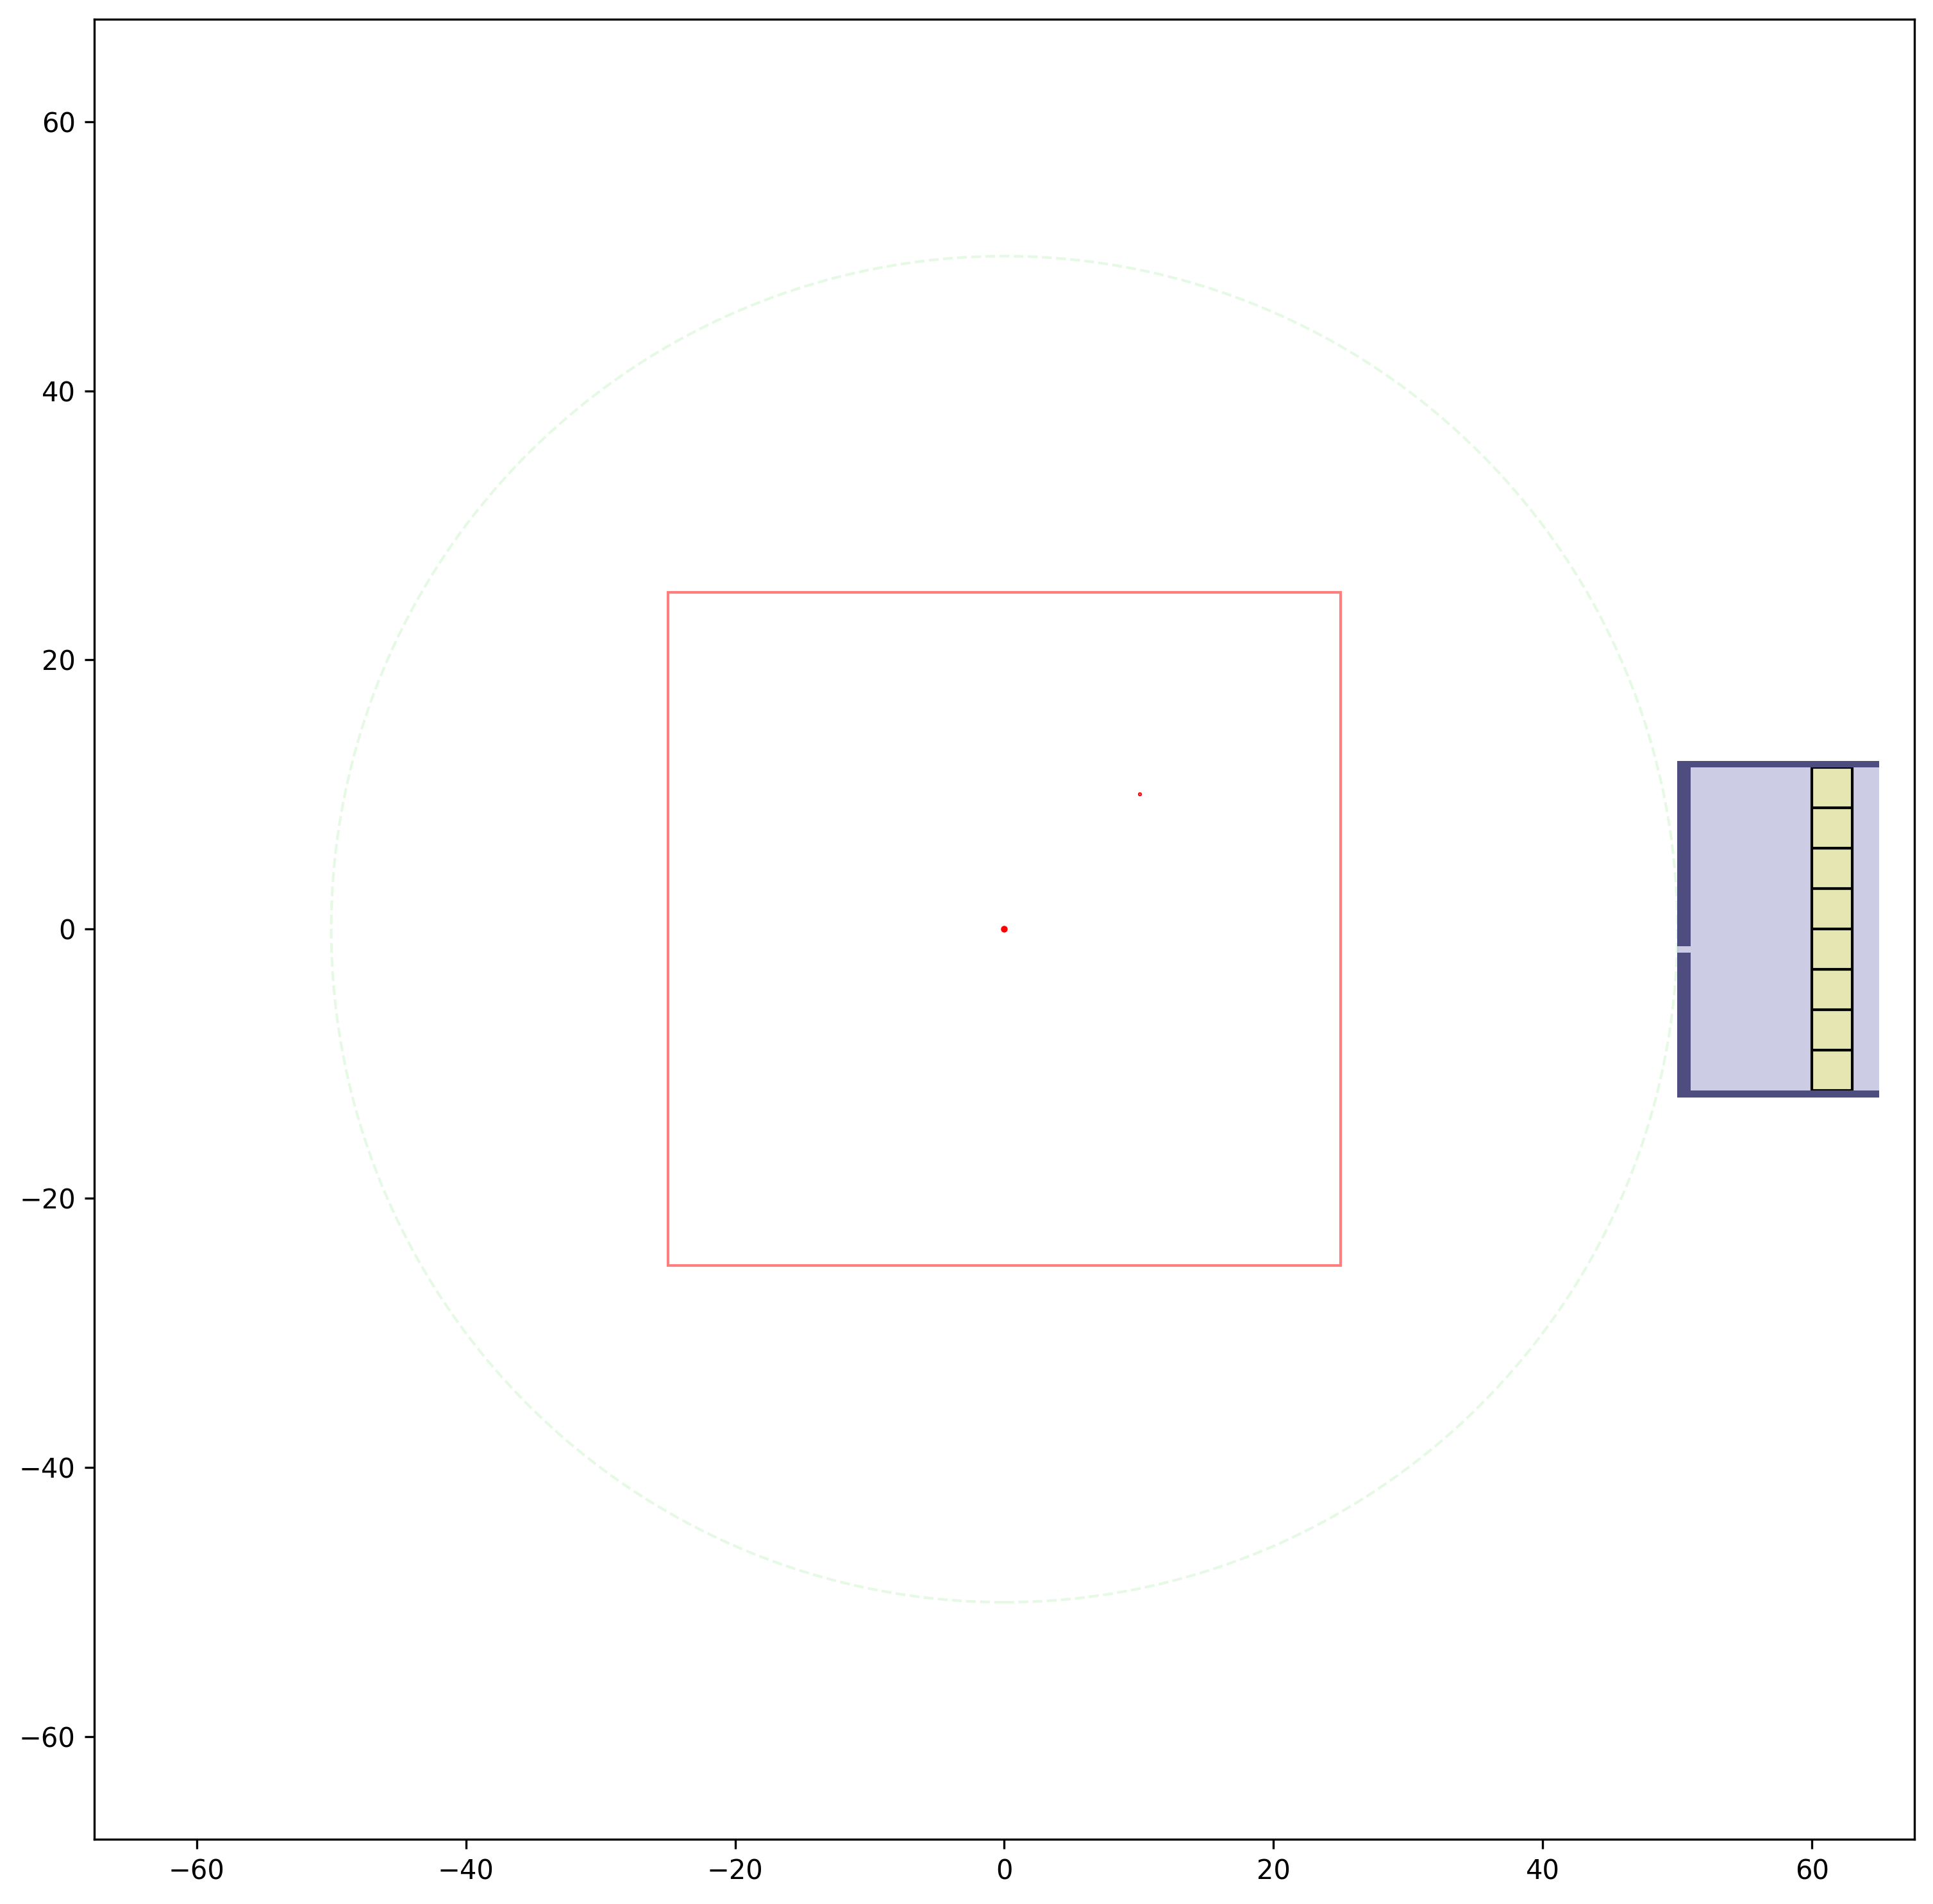

In [18]:
detGeoms = config["det geoms"]
detDim = np.array(
    [
        (np.max(detGeoms[:, idx * 2 + 1]) - np.min(detGeoms[:, idx * 2]))
        for idx in range(0, 3)
    ]
)
# print(np.max(detGeoms[:, 3]), np.min(detGeoms[:, 2]))
detectors = detGeoms[detGeoms[:, 6] != 0]
plates = detGeoms[detGeoms[:, 6] == 0]
imgDims = config["img nvx"] * config["mmpvx"]
angle = config["angle"]
radial_shift = config["dist"]
tangential_shift = detDim[1] * 0.5


def get_patchList(detectors, radial_shift, tangential_shift):
    det_xy = np.array(
        [detectors[:, 0] + radial_shift, detectors[:, 2] - tangential_shift]
    ).T
    det_inc_xy = np.array(
        [(detectors[:, 1] - detectors[:, 0]), (detectors[:, 3] - detectors[:, 2])]
    ).T
    return [
        mpl.patches.Rectangle(
            xy, inc_xy[0], inc_xy[1], angle=angle, rotation_point=(0, 0)
        )
        for xy, inc_xy in zip(det_xy, det_inc_xy)
    ]


pc1 = mpl.collections.PatchCollection(
    get_patchList(detectors, radial_shift, tangential_shift),
    ec="k",
    fc=(0.9, 0.9, 0.7, 1),
)
pc2 = mpl.collections.PatchCollection(
    get_patchList(plates, radial_shift, tangential_shift), ec="none", fc=(0.3, 0.3, 0.5, 1)
)
fig, ax = plt.subplots(figsize=(12, 10), dpi=300)
ax.add_patch(
    mpl.patches.Rectangle(
        (-imgDims[0] * 0.5, -imgDims[1] * 0.5),
        imgDims[0],
        imgDims[1],
        fc="none",
        ec=(1, 0, 0, 0.5),
    )
)
ax.add_patch(
    mpl.patches.Rectangle(
        (
            np.min(detGeoms[:, 0]) + radial_shift,
            np.min(detGeoms[:, 2]) - tangential_shift,
        ),
        detDim[0],
        detDim[1],
        fc=(0, 0, 0.5, 0.2),
        ec='none',
        angle=angle,
        rotation_point=(0, 0),
    )
)
ax.add_patch(
    mpl.patches.Circle((0, 0), radial_shift, fc="none", ec=(0, 0.8, 0, 0.1), ls="--")
)
ax.add_patch(mpl.patches.Circle((0, 0), 0.25, fc="r", ec="none", ls="--"))
ax.add_collection(pc1)
ax.add_collection(pc2)
figDimx = (detDim[0] + radial_shift) * 2
ax.set_xlim(-figDimx * 0.52, figDimx * 0.52)
ax.set_ylim(-figDimx * 0.52, figDimx * 0.52)
ax.set_aspect("equal")
subcentroids=pymatcal.get_subdivcoords(config)+np.array([10,10,0])
print(subcentroids)
ax.plot(subcentroids[:,0],subcentroids[:,1],'r.',ms=0.25)
fig.tight_layout()
fig.savefig("get_subdivcoords.pdf",dpi=300)